# Trying a deep learning algorithm for identification

This cade is base on thie [script](http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html)

## 1. Loading the dataset

In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2023-04-26 16:14:14.458860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 16:14:14.547923: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 16:14:15.005030: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-26 16:14:15.005071: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

### Examining the dataset

In [2]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)




We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

For each image there is a corresponding label, which is a class index.


In [3]:
import matplotlib.pyplot as plt

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


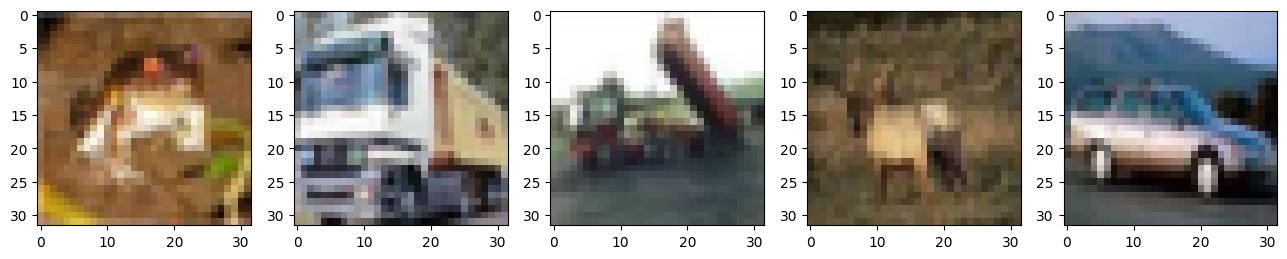

In [4]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

### Preparing the dataset



First we are going to use a Multilayer Perceptron to classify our images.

Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples. We also need to vectorize the images, since the MLP will take a 3072-dimensional vector as the input. When working with images, a simple way to normalize our data is to fit it within the 0 to 1 range.


In [5]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

## 2. MLP classifier

The MLPs are capable of modelling complex classification problems which are typically not linearly separable.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-04-26 16:14:16.944534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 16:14:16.948653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-04-26 16:14:16.948668: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-26 16:14:16.949406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

### Training the MLP



Let's train our model now! We will store the training loss values and metrics in a history object, so we can visualize the training process later.

We are going to train the model for 15 epochs, using a batch size of 32 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples (in practice however it is advised to separate the validation data from the training data altogether).


In [7]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 4s - loss: 1.8307 - accuracy: 0.3360 - val_loss: 1.7788 - val_accuracy: 0.3545 - 4s/epoch - 3ms/step
Epoch 2/15
1250/1250 - 3s - loss: 1.6531 - accuracy: 0.4078 - val_loss: 1.6423 - val_accuracy: 0.4121 - 3s/epoch - 3ms/step
Epoch 3/15
1250/1250 - 3s - loss: 1.5830 - accuracy: 0.4343 - val_loss: 1.5643 - val_accuracy: 0.4466 - 3s/epoch - 2ms/step
Epoch 4/15
1250/1250 - 3s - loss: 1.5372 - accuracy: 0.4493 - val_loss: 1.5567 - val_accuracy: 0.4498 - 3s/epoch - 2ms/step
Epoch 5/15
1250/1250 - 3s - loss: 1.5075 - accuracy: 0.4605 - val_loss: 1.5798 - val_accuracy: 0.4367 - 3s/epoch - 2ms/step
Epoch 6/15
1250/1250 - 3s - loss: 1.4809 - accuracy: 0.4676 - val_loss: 1.5127 - val_accuracy: 0.4652 - 3s/epoch - 2ms/step
Epoch 7/15
1250/1250 - 3s - loss: 1.4535 - accuracy: 0.4792 - val_loss: 1.4948 - val_accuracy: 0.4745 - 3s/epoch - 2ms/step
Epoch 8/15
1250/1250 - 3s - loss: 1.4325 - accuracy: 0.4868 - val_loss: 1.5078 - val_accuracy: 0.4727 - 3s/epoch - 2ms/step
Epoch 9/

With this simple function we will be able to plot our training history.

In [8]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

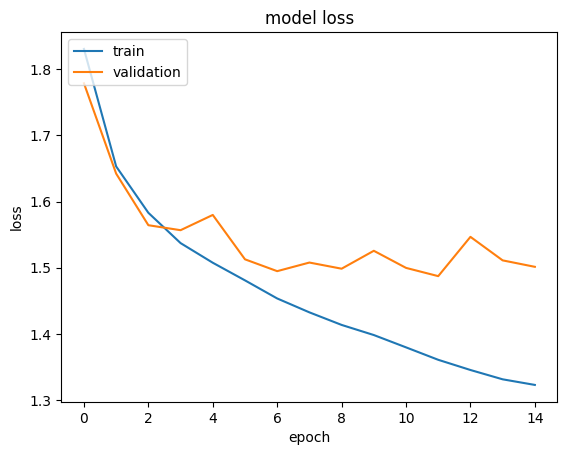

In [9]:
plotLosses(history)

### Evaluating the MLP

To get a measure of our model's performance we need to evaluate it using the test samples:

In [10]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [11]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.4868519306182861, 0.48420000076293945]


# 2. CNN classifier

So far, we have not exploited that we are working with images. By using [Convolutional Neural Networks](https://cs231n.github.io/convolutional-networks/), we can take advantage of the special structure of the inputs. Convolutions are  [translation invariant](https://stats.stackexchange.com/questions/208936/what-is-translation-invariance-in-computer-vision-and-convolutional-neural-netwo), and this makes them especially well suited for processing images.

### Preparing the dataset

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


### Creating CNN model

We will use two convolutional layers, each with 32 filters a kernel size of (3,3) and ReLU activation function.

In [14]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

### Training the CNN 

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 16s - loss: 1.5119 - accuracy: 0.4537 - val_loss: 1.2364 - val_accuracy: 0.5610 - 16s/epoch - 13ms/step
Epoch 2/15
1250/1250 - 17s - loss: 1.0820 - accuracy: 0.6156 - val_loss: 1.0613 - val_accuracy: 0.6241 - 17s/epoch - 13ms/step
Epoch 3/15
1250/1250 - 16s - loss: 0.8520 - accuracy: 0.7016 - val_loss: 1.0255 - val_accuracy: 0.6477 - 16s/epoch - 13ms/step
Epoch 4/15
1250/1250 - 16s - loss: 0.6422 - accuracy: 0.7769 - val_loss: 1.0542 - val_accuracy: 0.6552 - 16s/epoch - 12ms/step
Epoch 5/15
1250/1250 - 16s - loss: 0.4413 - accuracy: 0.8450 - val_loss: 1.1392 - val_accuracy: 0.6650 - 16s/epoch - 13ms/step
Epoch 6/15
1250/1250 - 17s - loss: 0.2931 - accuracy: 0.8967 - val_loss: 1.2662 - val_accuracy: 0.6610 - 17s/epoch - 13ms/step
Epoch 7/15
1250/1250 - 15s - loss: 0.1975 - accuracy: 0.9330 - val_loss: 1.5311 - val_accuracy: 0.6583 - 15s/epoch - 12ms/step
Epoch 8/15
1250/1250 - 15s - loss: 0.1513 - accuracy: 0.9464 - val_loss: 1.6789 - val_accuracy: 0.6500 - 15s/ep

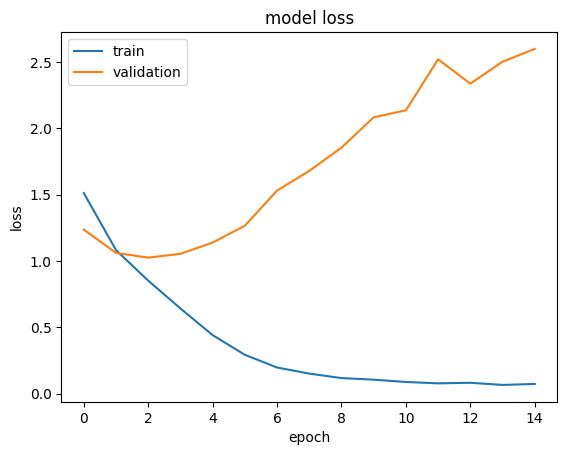

In [16]:
plotLosses(history)

### Evaluating CNN

In [17]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [18]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.6456003189086914, 0.6448000073432922]




As we can see, the CNN reached significantly higher accuracy than the MLP classifier, but overfitting occured during the training of our model. To avoid this, the use of some [regularization techniques](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/) would be advised.


# 3. Regularization

In most cases, larger models have a tendency to overfit training data. While getting good performance on the training set, they will perform poorly on the test set. Regularization methods are used to prevent overfitting, making these larger models generalize better.

###  3.1 Dropout

[Dropout](https://arxiv.org/abs/1207.0580) works on a neural network layer by masking a random subset of its outputs (zeroing them) for every input with probability p and scaling up the rest of the outputs by 1/(1 - p).

Dropout is normally used during training. Masking prevents gradient backpropagation through the masked outputs. The method thus selects a random subset of the neural network to train on any particular example. This can be thought of as training a model ensemble to solve the task, with the individual models sharing parameters.

At test time, p is set to zero. This can be interpreted as averaging the outputs of the ensemble models. Because of the scaling, the expected layer outputs are the same during training and testing.


In [19]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)


### Training the CNN which now contains dropout layers

In [20]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 17s - loss: 1.6917 - accuracy: 0.3829 - val_loss: 1.3340 - val_accuracy: 0.5361 - 17s/epoch - 14ms/step
Epoch 2/15
1250/1250 - 17s - loss: 1.3350 - accuracy: 0.5250 - val_loss: 1.1790 - val_accuracy: 0.5853 - 17s/epoch - 14ms/step
Epoch 3/15
1250/1250 - 17s - loss: 1.1903 - accuracy: 0.5779 - val_loss: 1.0863 - val_accuracy: 0.6114 - 17s/epoch - 13ms/step
Epoch 4/15
1250/1250 - 18s - loss: 1.0903 - accuracy: 0.6146 - val_loss: 1.0193 - val_accuracy: 0.6448 - 18s/epoch - 14ms/step
Epoch 5/15
1250/1250 - 18s - loss: 1.0186 - accuracy: 0.6375 - val_loss: 0.9937 - val_accuracy: 0.6552 - 18s/epoch - 14ms/step
Epoch 6/15
1250/1250 - 18s - loss: 0.9413 - accuracy: 0.6665 - val_loss: 0.9870 - val_accuracy: 0.6614 - 18s/epoch - 14ms/step
Epoch 7/15
1250/1250 - 18s - loss: 0.8804 - accuracy: 0.6905 - val_loss: 0.9574 - val_accuracy: 0.6701 - 18s/epoch - 14ms/step
Epoch 8/15
1250/1250 - 18s - loss: 0.8187 - accuracy: 0.7104 - val_loss: 0.9665 - val_accuracy: 0.6728 - 18s/ep

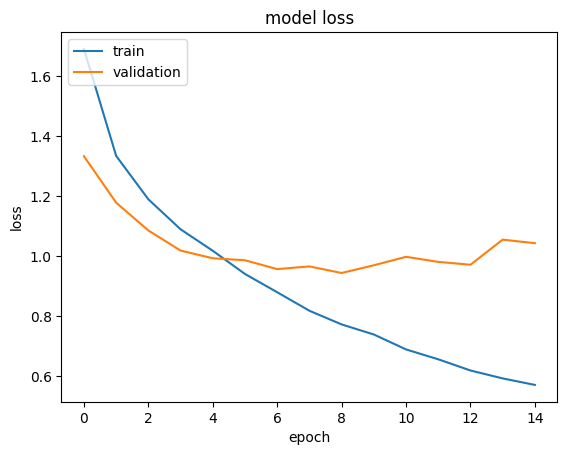

In [21]:
plotLosses(history)


### 3.2 Batch normalization

[Batch Normalization]() works by normalizing layer outputs to a running mean and variance. This speeds up training and improves the final performance of the model. The running statistics are fixed at test time.

While batch normalization works as a regularizer, it also benefits smaller models.


In [22]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)


In [23]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 22s - loss: 1.5882 - accuracy: 0.4338 - val_loss: 1.4784 - val_accuracy: 0.4527 - 22s/epoch - 18ms/step
Epoch 2/15
1250/1250 - 20s - loss: 1.2477 - accuracy: 0.5554 - val_loss: 1.3327 - val_accuracy: 0.5523 - 20s/epoch - 16ms/step
Epoch 3/15
1250/1250 - 20s - loss: 1.0942 - accuracy: 0.6109 - val_loss: 1.1288 - val_accuracy: 0.6014 - 20s/epoch - 16ms/step
Epoch 4/15
1250/1250 - 18s - loss: 0.9940 - accuracy: 0.6467 - val_loss: 0.9857 - val_accuracy: 0.6529 - 18s/epoch - 14ms/step
Epoch 5/15
1250/1250 - 18s - loss: 0.9226 - accuracy: 0.6755 - val_loss: 0.8793 - val_accuracy: 0.6889 - 18s/epoch - 14ms/step
Epoch 6/15
1250/1250 - 20s - loss: 0.8584 - accuracy: 0.6955 - val_loss: 0.8674 - val_accuracy: 0.6952 - 20s/epoch - 16ms/step
Epoch 7/15
1250/1250 - 18s - loss: 0.8162 - accuracy: 0.7101 - val_loss: 1.0907 - val_accuracy: 0.6324 - 18s/epoch - 15ms/step
Epoch 8/15
1250/1250 - 18s - loss: 0.7688 - accuracy: 0.7276 - val_loss: 0.8878 - val_accuracy: 0.6948 - 18s/ep

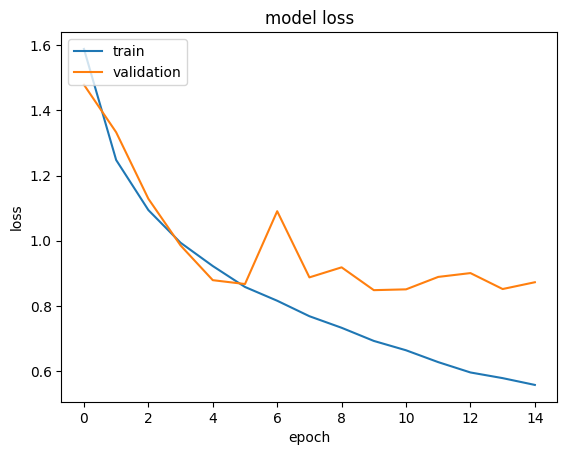

In [24]:
plotLosses(history)

### Evaluating the CNN (with dropout and batch normalization)

In [25]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [26]:
print(model.metrics_names)
print(score)


['loss', 'accuracy']
[0.8793739080429077, 0.7156999707221985]


### 3.3 Data Augmentation

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [28]:
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(learning_rate=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [30]:
# fits the model on batches with real-time data augmentation:
history = model.fit(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[40000:]) / 32,
                    steps_per_epoch=len(X_train[:40000]) / 32,
                    epochs=15,
                    verbose=2)

Epoch 1/15
1250/1250 - 20s - loss: 1.6563 - accuracy: 0.4208 - val_loss: 1.3861 - val_accuracy: 0.5063 - 20s/epoch - 16ms/step
Epoch 2/15
1250/1250 - 21s - loss: 1.2959 - accuracy: 0.5372 - val_loss: 1.0635 - val_accuracy: 0.6148 - 21s/epoch - 17ms/step
Epoch 3/15
1250/1250 - 21s - loss: 1.1938 - accuracy: 0.5742 - val_loss: 1.0421 - val_accuracy: 0.6341 - 21s/epoch - 17ms/step
Epoch 4/15
1250/1250 - 22s - loss: 1.1433 - accuracy: 0.5944 - val_loss: 0.9821 - val_accuracy: 0.6581 - 22s/epoch - 18ms/step
Epoch 5/15
1250/1250 - 21s - loss: 1.1020 - accuracy: 0.6092 - val_loss: 1.0977 - val_accuracy: 0.6254 - 21s/epoch - 17ms/step
Epoch 6/15
1250/1250 - 20s - loss: 1.0685 - accuracy: 0.6210 - val_loss: 0.9023 - val_accuracy: 0.6826 - 20s/epoch - 16ms/step
Epoch 7/15
1250/1250 - 20s - loss: 1.0444 - accuracy: 0.6321 - val_loss: 0.8955 - val_accuracy: 0.6892 - 20s/epoch - 16ms/step
Epoch 8/15
1250/1250 - 21s - loss: 1.0212 - accuracy: 0.6436 - val_loss: 0.9666 - val_accuracy: 0.6593 - 21s/ep

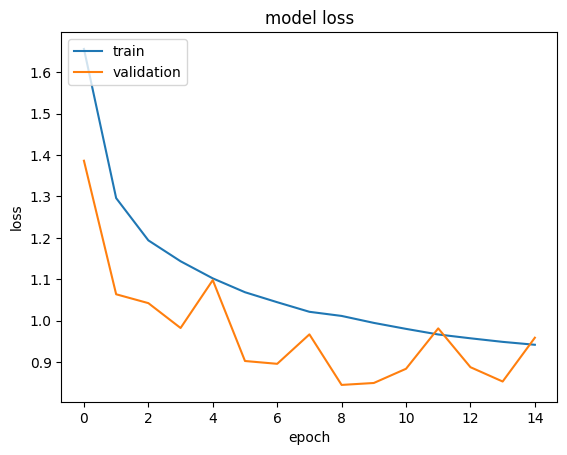

In [31]:
plotLosses(history)

#### Evaluating the CNN (with dropout, batch normalization and data augmentation)

In [32]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [33]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.9708974361419678, 0.6626999974250793]


More information in [Github](https://github.com/Hvass-Labs/TensorFlow-Tutorials).

# 4. Transfer learning

It is common practice to use pretrained networks in image processing, since large datasets are relatively uncommon, the training of a large network requires significant resources and it usually takes a long time (e.g. modern networks take 2-3 weeks to train across multiple GPUs on ImageNet, which contains 1.2 million images with 1000 categories).

### Inception V3

The [Inception](https://arxiv.org/abs/1512.00567) model is a pretrained network for the [ImageNet](https://image-net.org/) challenge, released by Google. The namesake of the network are the Inception modules, which are basically smaller models inside the bigger model. The same architecture was used in the GoogLeNet model, which was a state of the art image recognition model in 2014.

First, lets preview our classification process of CIFAR-10! Since the Inception model is enormous compared to the networks we have worked with so far, it would take too much time to train the whole network. The trick is to add new classification layers to it, and train only those. While we do not have to actually train the Inception model, we do need to generate output for the CIFAR-10 dataset, which is quite tedious by itself. The output of a single image is going to be a 2048 dimension vector, illustrated below as 'Transfer-Values Saved in Cache'. After we generate this output vector for all the images, we can feed them to a simple classification network.



#### Loading the dataset

While the CIFAR-10 dataset is easily accessible in keras, these 32x32 pixel images cannot be fed as the input of the Inceptionv3 model as they are too small. For the sake of simplicity we will use an other library to load and upscale the images, then calculate the output of the Inceptionv3 model for the CIFAR-10 images as seen above.

Visiti the [repo](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/07_Inception_Model.ipynb).


In [42]:
import requests

url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "data/"
r = requests.get(url)

In [43]:
# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open("cifar-10-python.tar.gz",'wb') as f:
  
    # Saving received content as a png file in
    # binary format
  
    # write the contents of the response (r.content)
    # to a new file in binary mode.
    f.write(r.content)

In [41]:
from load_data.data_loader import load_data
import numpy as np

dataset = load_data(download_dir)
dataset['images_train'] = np.reshape(dataset['images_train'], (-1, 3, 32, 32))
dataset['images_train'] = np.transpose(dataset['images_train'], (0,2,3,1))
dataset['images_test'] = np.reshape(dataset['images_test'], (-1, 3, 32, 32))
dataset['images_test'] = np.transpose(dataset['images_test'], (0,2,3,1))

from keras.utils.np_utils import to_categorical   

categorical_labels = to_categorical(dataset['labels_train'], num_classes=10)
categorical_test_labels = to_categorical(dataset['labels_test'], num_classes=10)

ModuleNotFoundError: No module named 'load_data'